In [1]:
#pip install numpy==1.26.4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
df=pd.read_csv('Fraud.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Q1. Data cleaning including missing values, outliers and multi-collinearity.

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
print(df.nunique())

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64


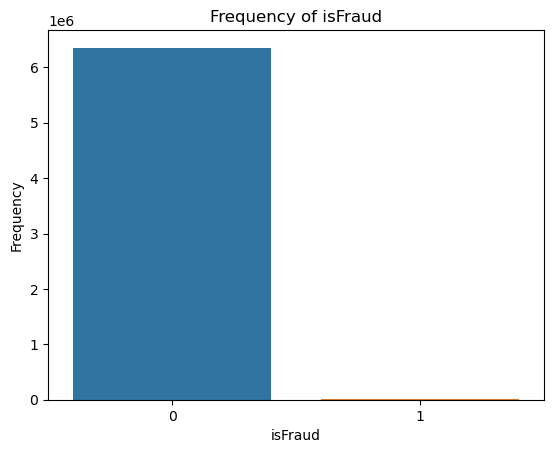

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [8]:
sns.countplot(x='isFraud', data=df)
plt.title('Frequency of isFraud')
plt.xlabel('isFraud')
plt.ylabel('Frequency')
plt.show()
print(df['isFraud'].value_counts())

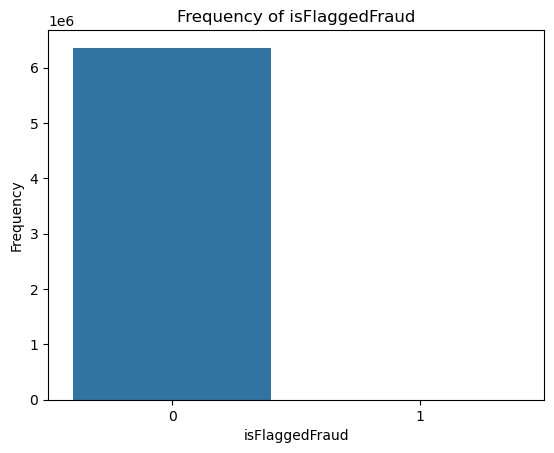

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


In [9]:
sns.countplot(x='isFlaggedFraud', data=df)
plt.title('Frequency of isFlaggedFraud')
plt.xlabel('isFlaggedFraud')
plt.ylabel('Frequency')
plt.show()
print(df['isFlaggedFraud'].value_counts())

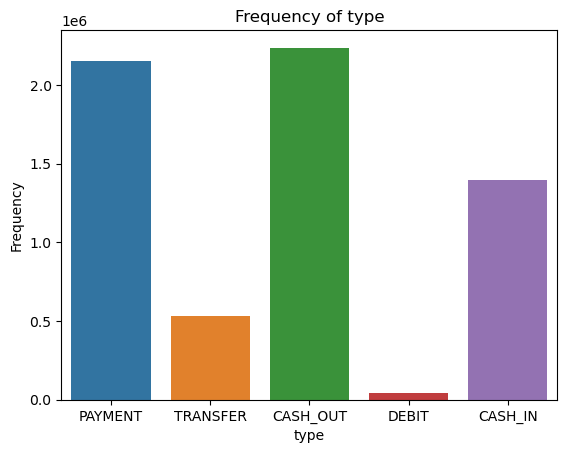

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [10]:
sns.countplot(x='type', data=df)
plt.title('Frequency of type')
plt.xlabel('type')
plt.ylabel('Frequency')
plt.show()
print(df['type'].value_counts())

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['type']= label_encoder.fit_transform(df['type'])
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


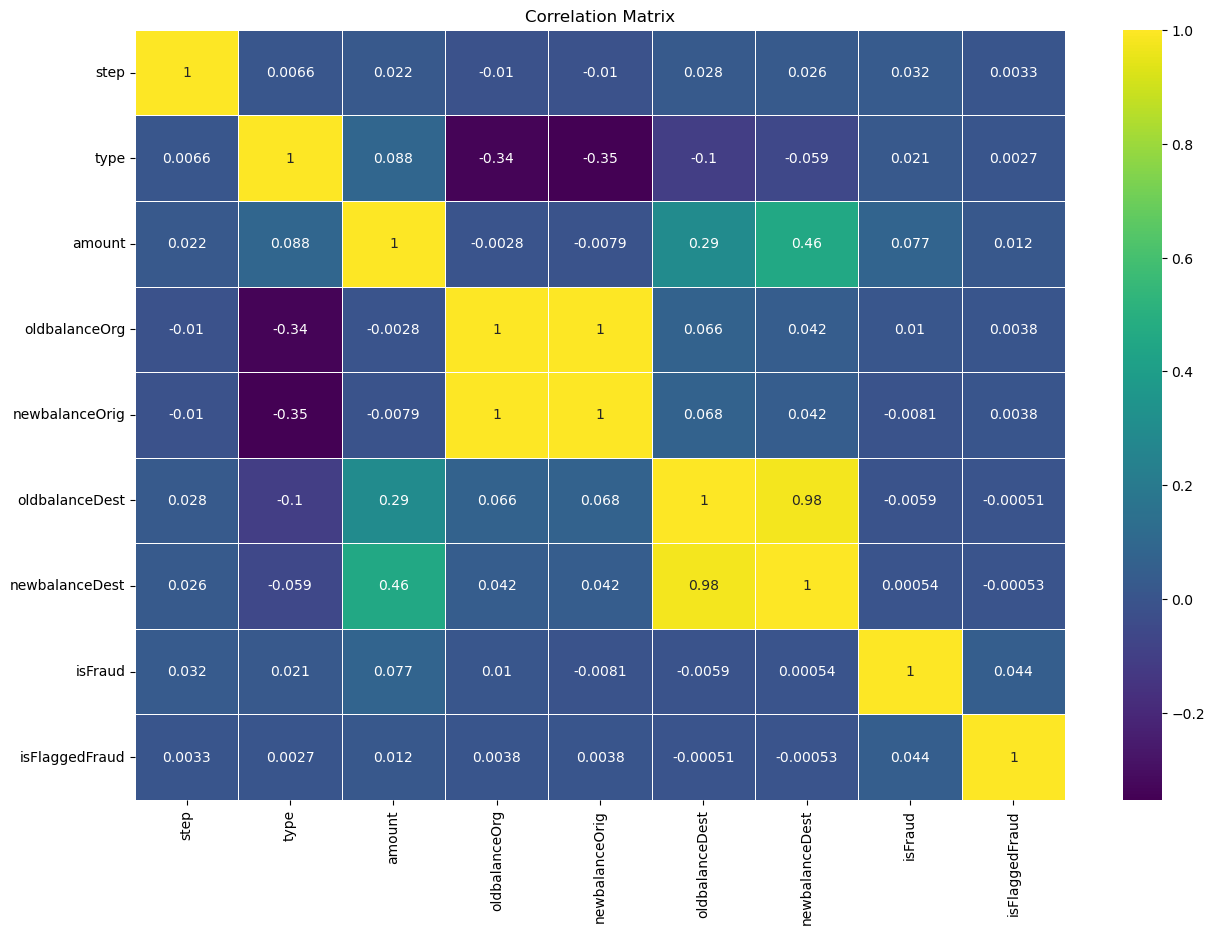

In [12]:
# Multi-collinearity
# Calculate the correlation matrix
correlation_matrix = df.drop(['nameOrig','nameDest'], axis='columns').corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,cmap='viridis', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

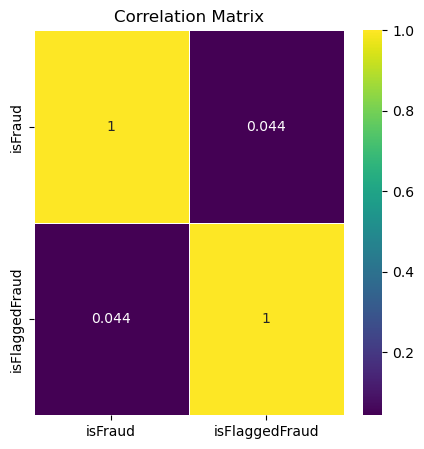

In [13]:
correlation_matrix = df[['isFraud', 'isFlaggedFraud']].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True,cmap='viridis', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

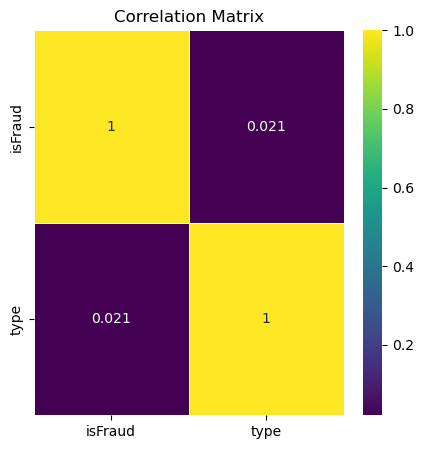

In [14]:
correlation_matrix = df[['isFraud', 'type']].corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True,cmap='viridis', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

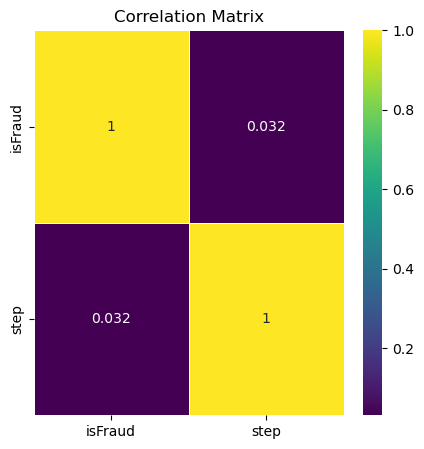

In [15]:
correlation_matrix = df[['isFraud', 'step']].corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True,cmap='viridis', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [16]:
df['diff_balanceOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diff_balanceDest'] = df['oldbalanceDest'] - df['newbalanceDest']
df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

# Q2. Describe your fraud detection model in elaboration.
# Q3. How did you select variables to be included in the model?
## Overview
Our fraud detection model uses financial transaction data, which includes various features about the origin and destination accounts and their balances, to identify potentially fraudulent transactions.

Key features include:
- `oldbalanceOrg`: The initial balance of the origin account
- `newbalanceOrig`: The updated balance of the origin account
- `oldbalanceDest`: The initial balance of the destination account
- `newbalanceDest`: The updated balance of the destination account

Additional fields, such as `type`, `step`, and `isFlaggedFraud`, are also available but were determined to be less relevant through correlation analysis.

## Feature Engineering

To enhance the model's ability to detect fraudulent activities, we created new features and removed redundant or irrelevant ones.

### 1. Calculating Balance Differences
To capture changes in balances, we calculated two new features:
- `diff_balanceOrg`: Difference in balance for the origin account (`oldbalanceOrg` - `newbalanceOrig`)
- `diff_balanceDest`: Difference in balance for the destination account (`oldbalanceDest` - `newbalanceDest`)

These new features provide a direct measure of funds transferred in each transaction, helping to identify anomalies.

### 2. Dropping Redundant Features
Once the balance difference features were created, we removed the original balance fields (`oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`) from the dataset to reduce redundancy and improve model interpretability.

### 3. Excluding Irrelevant Features
Through correlation analysis, we observed that:
- Features like `step`, `type`, and `isFlaggedFraud` showed no significant correlation with fraud, suggesting that they add limited value to prediction.
- Fields such as `nameOrig` and `nameDest` contain mostly unique values, making them inconsistent across transactions and, therefore, non-informative for fraud prediction.

As a result, these columns were excluded from the model to focus on the most relevant features.

## Summary
By focusing on derived features and excluding irrelevant ones, our model is designed to maximize accuracy in detecting fraudulent transactions while improving computational efficiency.


In [17]:
df.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,diff_balanceOrg,diff_balanceDest
0,1,3,9839.64,C1231006815,M1979787155,0,0,9839.64,0.0
1,1,3,1864.28,C1666544295,M2044282225,0,0,1864.28,0.0
2,1,4,181.00,C1305486145,C553264065,1,0,181.00,0.0
3,1,1,181.00,C840083671,C38997010,1,0,181.00,21182.0
4,1,3,11668.14,C2048537720,M1230701703,0,0,11668.14,0.0


# Fraud Detection Model Performance Evaluation

In this notebook, we demonstrate the performance of a fraud detection model using Logistic Regression and Random Forest Classifier, two popular machine learning algorithms. We'll assess each model's accuracy and training time to determine which is best suited for this task.

## 1. Data Preparation

We first split the dataset into training and test sets, using the features `amount`, `diff_balanceOrg`, and `diff_balanceDest` to predict the target variable `isFraud`.


In [18]:
from sklearn.model_selection import train_test_split
X = df[['amount','diff_balanceOrg','diff_balanceDest']]
y = df['isFraud']
# Prepare data
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## 2. Data Standardization

To improve model performance, we standardize the feature values using `StandardScaler`.


In [19]:
from sklearn.preprocessing import StandardScaler
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#fit_transform(X_train) computes the mean and standard deviation of the training data and then scales it.
#transform(X_test) scales the test data using the same mean and standard deviation computed from the training data.

## 3. Model Training and Evaluation

We train two models: `LogisticRegression` and `RandomForestClassifier`. For each model, we evaluate the time taken for training and the accuracy on the test set.

### Logistic Regression


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Initialize the LogisticRegression
start_time = time.time()
lg_model = LogisticRegression(random_state=42)
# Train the model
lg_model.fit(X_train, y_train)
end_time = time.time()
print(f"Time of LogisticRegression: {end_time - start_time:.4f} seconds")
# Make predictions
x_test_prediction_lg = lg_model.predict(X_test)
# Evaluate the model
test_data_accuracy_lg = accuracy_score(x_test_prediction_lg,y_test)
print(f'Accuracy of Logistic Regression: {test_data_accuracy_lg * 100:.2f}%')

Time of LogisticRegression: 10.9206 seconds
Accuracy of Logistic Regression: 99.92%


### Random Forest Classifier


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
# Initialize the Random Forest classifier
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
end_time = time.time()
print(f"Time of RandomForestClassifier: {end_time - start_time:.4f} seconds")
# Make predictions
y_pred = rf_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of RandomForestClassifier: {accuracy * 100:.2f}%')

Time of RandomForestClassifier: 29.8311 seconds
Accuracy of RandomForestClassifier: 99.91%


## Summary

The performance of the two models is compared below:
- **Logistic Regression**:Provides a baseline model with relatively fast training time.
- **Random Forest Classifier**: Achieves similar accuracy with potentially longer training time.
    
Both models give almost the same accuracy, so the choice of model depends on the specific requirements for computation time and complexity in the fraud detection application.

## 5. Key Factors that Predict Fraudulent Customers

The key factors that help predict fraudulent customers based on transaction data include:

1. **Transaction Amount**: Large or unusually high-value transactions are a strong indicator of fraud.
2. **Balance Differences**: Significant changes in the origin (`diff_balanceOrg`) and destination (`diff_balanceDest`) account balances could signal suspicious behavior.

## 6. Do These Factors Make Sense?

- **Yes**, these factors make sense because:
  - **Transaction Amount**: Fraudulent transactions often involve larger amounts, as they maximize the potential gain for fraudsters.
  - **Balance Differences**: A large difference in account balances indicates an unusually large transfer of funds, often linked with fraudulent activities.

- **No**, these factors may not always capture all fraud scenarios:
  - Fraud can occur with smaller transactions, such as in phishing attacks or account takeovers, where the fraudulent behavior is more subtle.

## 7. Prevention Measures for Infrastructure Updates

To prevent fraud and protect the infrastructure, companies should adopt the following measures:

1. **Enhanced Security Protocols**:
   - Use stronger encryption and multi-factor authentication (MFA) to secure accounts and transactions.
  
2. **Real-Time Fraud Detection**:
   - Implement machine learning or AI-based fraud detection systems to identify and flag suspicious transactions as they occur.
   
3. **Transaction Monitoring**:
   - Monitor transactions for anomalies, such as large, rapid transfers or unusual patterns, which could indicate fraud.
   
4. **Account Locking and Alerts**:
   - Automatically lock accounts after suspicious transactions and send immediate alerts to users and administrators.
   
5. **Data Integrity**:
   - Ensure the integrity and accuracy of transaction data to prevent manipulation and maintain system reliability.

## 8. Determining If Preventive Actions Work

To determine whether these preventive actions are effective, we can use the following approaches:

1. **Model Performance**:
   - Track changes in the fraud detection model's accuracy, precision, and recall over time. The model should increase its true positive rate and reduce false negatives.

2. **Fraud Rate**:
   - Measure the rate of fraud before and after implementing the measures. A decrease in fraudulent transactions suggests the measures are working.

3. **Customer Feedback**:
   - Collect customer feedback to monitor false positives and avoid inconveniencing legitimate customers. The goal is to strike a balance between fraud detection and customer satisfaction.

4. **Financial Impact**:
   - Assess the financial losses due to fraud before and after implementing the updates. A reduction in financial losses indicates successful fraud prevention.

5. **Behavioral Analytics**:
   - Monitor customer behavior patterns for any emerging risks or new fraud trends that might arise due to the infrastructure changes. Adjust the model or measures accordingly.

By focusing on these indicators, we can measure the effectiveness of the actions and improve the infrastructure to better prevent fraud.

